In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pan

In [2]:
# Parameters
learning_rate = 0.01
training_epochs = 5000
display_step = 1000

In [3]:
# Training Data
train_X = pan.read_csv('x.dat')
train_Y = pan.read_csv('y.dat')

m = len(train_X)

In [4]:
# tf Graph Input
X = tf.placeholder(tf.float32, shape=([50, 1]))
Y = tf.placeholder(tf.float32, shape=([50, 1]))

In [5]:
# Set model weights
W = tf.Variable(tf.zeros([1]), name="weight")
b = tf.Variable(tf.zeros([1]), name="bias")

In [6]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [7]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*m)

In [8]:
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [9]:
session = tf.Session()
session.run(tf.global_variables_initializer())

In [10]:
for epoch in range(training_epochs):
    c = session.run(optimizer, feed_dict={X: train_X, Y: train_Y})

    #Display logs per epoch step
    if (epoch+1) % display_step == 0:
        c = session.run(cost, feed_dict={X: train_X, Y:train_Y})
        print (" Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), "W=", session.run(W), "b=", session.run(b))

 Epoch: 1000 cost= 0.004405471 W= [ 0.10972781] b= [ 0.49817145]
 Epoch: 2000 cost= 0.001411822 W= [ 0.080042] b= [ 0.66133624]
 Epoch: 3000 cost= 0.001039847 W= [ 0.06957782] b= [ 0.71885151]
 Epoch: 4000 cost= 0.000993628 W= [ 0.06588921] b= [ 0.73912555]
 Epoch: 5000 cost= 0.000987885 W= [ 0.06458903] b= [ 0.74627179]


In [11]:
training_cost = session.run(cost, feed_dict={X: train_X, Y: train_Y})
print ("Training cost=", training_cost, "W=", session.run(W), "b=", session.run(b), '\n')

Training cost= 0.000987885 W= [ 0.06458903] b= [ 0.74627179] 



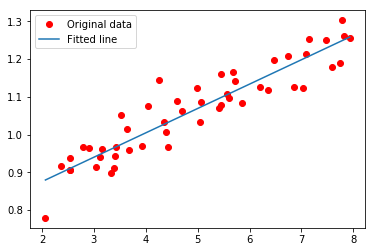

In [12]:
#Graphic display
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(train_X, session.run(W) * train_X + session.run(b), label='Fitted line')
plt.legend()
plt.show()